<a href="https://colab.research.google.com/github/chettkulkarni/MachineLearning/blob/master/NLP_NLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
import pandas as pd
!pip install textract
import os
import requests
import textract
import re
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation as LDA

import random
random.seed(1)

     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 112kB 7.3MB/s 
     |████████████████████████████████| 32.8MB 117kB/s 
     |████████████████████████████████| 112kB 36.1MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 5.6MB 47.4MB/s 
     |████████████████████████████████| 8.9MB 46.6MB/s 
     |████████████████████████████████| 112kB 46.5MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 13.7MB 37.9MB/s 
     |████████████████████████████████| 143kB 48.1MB/s 
  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3963 sha256=79dcd0661ed876e9b1f770d10112accd314521b1c1a3817ed719a4be314e8298
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
  Created wheel for EbookLib: filename=EbookLib-0.17.1-cp36-none-any.whl size=38164 sha256=97d3c3fa97e3ba06200c4dec1f2fdb22350440

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))


In [0]:
def lets_lda(url,filename):
  myfile = requests.get(url)
  open(filename, 'wb').write(myfile.content)
  text = textract.process(filename)
  text=text.decode('utf-8')
  result = re.sub(r"\W", " ", text, flags=re.I)
  print(result)
  result=result.lower()
  result=re.sub('[,\.!?]',' ',result)
  result=re.sub(" \d+", " ", result)
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
  long_string=result
  wordcloud.generate(long_string)
  wordcloud.to_image()

  sns.set_style('whitegrid')
  %matplotlib inline

  count_vectorizer = CountVectorizer(stop_words='english')

  string=result.split(' ')
  count_data = count_vectorizer.fit_transform(string)
  plot_10_most_common_words(count_data, count_vectorizer)

  number_topics = 10
  number_words = 10
  lda = LDA(n_components=number_topics, n_jobs=-1)
  lda.fit(count_data)
  print("Topics found via LDA:")
  print_topics(lda, count_vectorizer, number_words)

A Survey of Deep Learning Techniques for Neural  Machine Translation  Shuoheng Yang  Yuxin Wang  Xiaowen Chu  Department of Computer science Hong Kong Baptist University  yshuoheng gmail com   yxwang  chxw  comp hkbu edu hk  Hong Kong  China  0 2 0 2     b e F 8 1           L C   s c        1 v 6 2 5 7 0     2 0 0 2   v i X r a  Abstract In recent years  natural language processing  NLP  has got great development with deep learning techniques  In the sub ﬁeld of machine translation  a new approach named Neural Machine Translation  NMT  has emerged and got massive attention from both academia and industry  However  with a signiﬁcant number of researches proposed in the past several years  there is little work in investigating the development process of this new technology trend  This literature survey traces back the origin and principal development timeline of NMT  investigates the important branches  categorizes different research orientations  and discusses some future research trend

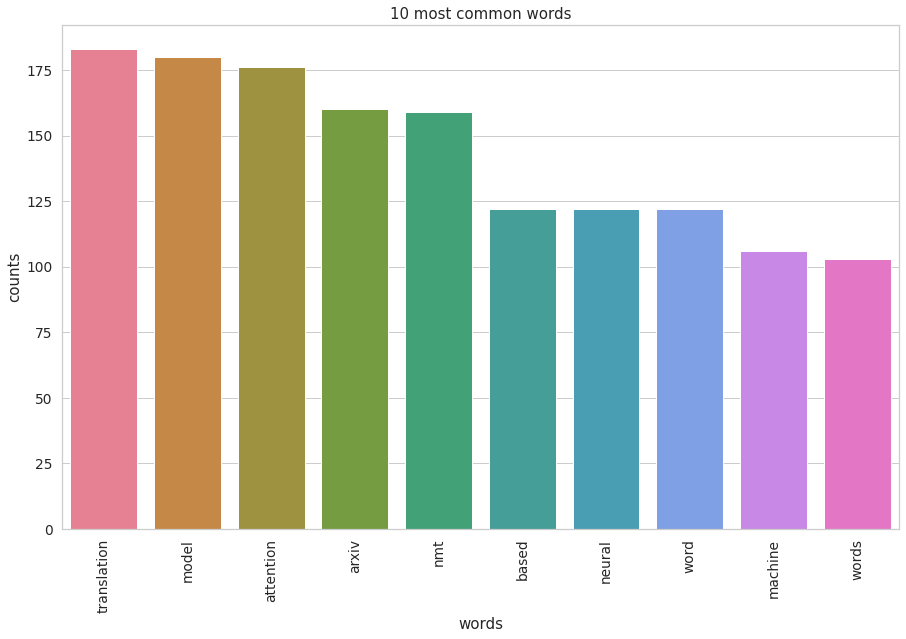

Topics found via LDA:

Topic #0:
word vector vocabulary time work conference processing long bengio size

Topic #1:
machine method sentence training information structure pp different network target

Topic #2:
sequence layer task data current end sub step section international

Topic #3:
translation et source process used input similar result development got

Topic #4:
neural words transformer learning applied new architecture hidden wu additional

Topic #5:
arxiv based language rnn original methods recurrent association layers better

Topic #6:
proposed mechanism deep smt oov networks problem cid character probability

Topic #7:
nmt al preprint encoder using research nlm length decoding statistical

Topic #8:
model models decoder alignment linguistics state representation self mt steps

Topic #9:
attention performance context cnn computational modeling position later zhang human
0 2 0 2    r p A 7              E P o i b   q        1 v 3 5 1 4 0     4 0 0 2   v i X r a  Estimating the 

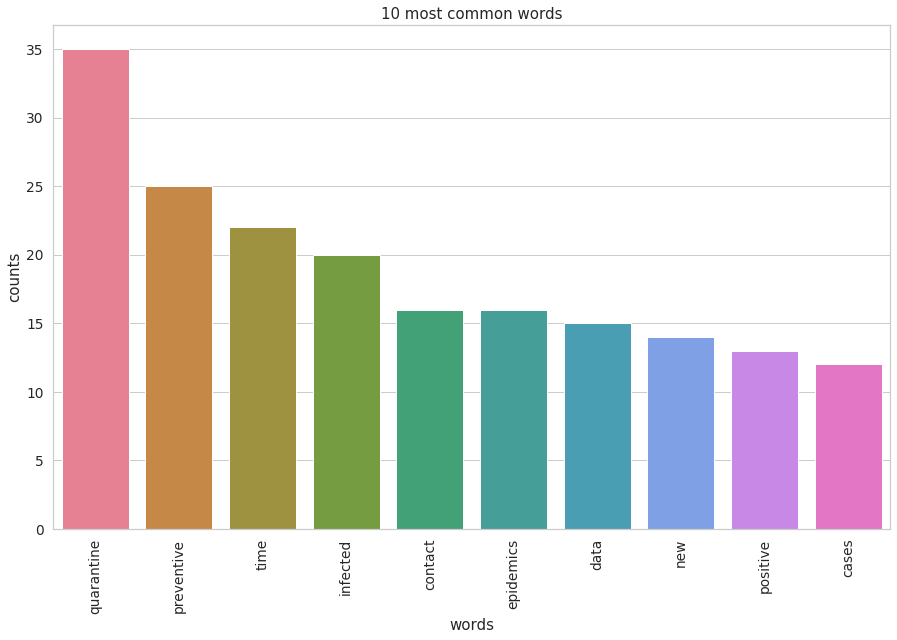

Topics found via LDA:

Topic #0:
cases number history epidemiology italy wuhan does reduce signiﬁcant line

Topic #1:
preventive individuals forward wang contains average diﬀerent right contribute iτ

Topic #2:
contact data qτ possible people day got available control measures

Topic #3:
contagion tracing enforced covid times apps epidemic th positivesdays network

Topic #4:
time epidemics new assume li eﬀect tq values quarantined disease

Topic #5:
quarantine infected ti set infection impact spread eﬀects scenario reconstruct

Topic #6:
measure individual case week estimate figure study period adopted region

Topic #7:
contacts know let analysis ratio april social particular happens empir

Topic #8:
positives parameters population model cid reconstructed reasonable reverse eﬃciency fraction

Topic #9:
positive approach tested knows eτ arxiv latency estimated don sars
Draft version April 10  2020 Preprint typeset using LATEX style emulateapj v  12 16 11  0 2 0 2    r p A 8             

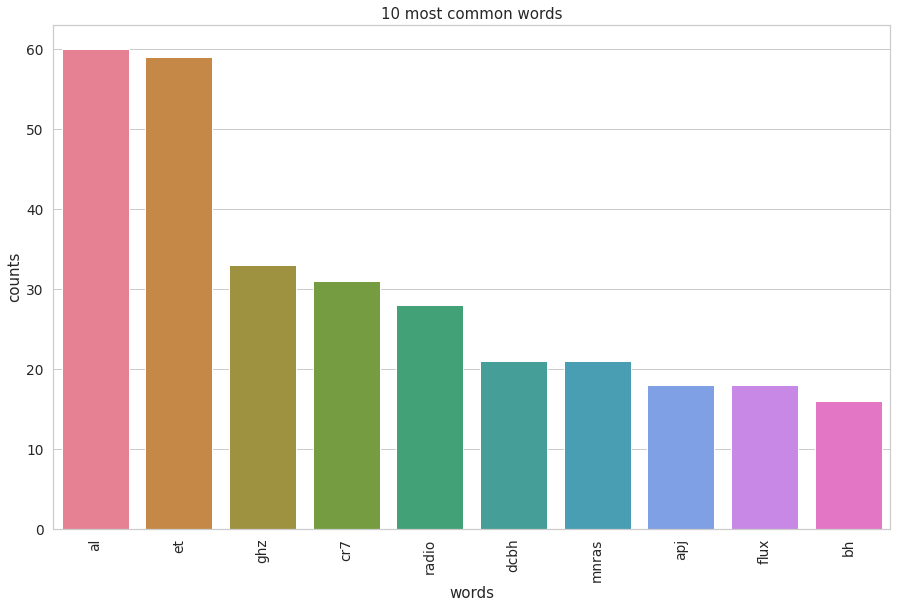

Topics found via LDA:

Topic #0:
bh form collapse luminosity accretion dashed observations detected wise agarwal

Topic #1:
detection star woods conﬁrm mhz presence bowler obtained grant bon13

Topic #2:
apj ska large number lr cc kor06 abel cm di

Topic #3:
al log lx young fp array ultekin explosions institute vlass

Topic #4:
ghz ﬁrst mass ngvla yr rates section far fig data

Topic #5:
et whalen sne mezcua limit ambient erg science starburst gul09

Topic #6:
sn stars pop frame ii quasars njy synchrotron lotss rate

Topic #7:
cr7 dcbh ﬂux emission µjy remnant matthee black wide beam

Topic #8:
mnras ﬂuxes university table spectral narrow early ledd relativistic observer

Topic #9:
radio iii ﬁelds times tokyo high emit upper formation dcbhs


In [0]:
lets_lda('https://arxiv.org/pdf/2002.07526.pdf','AI.pdf')
lets_lda('https://arxiv.org/pdf/2004.04153.pdf','Bio.pdf')
lets_lda('https://arxiv.org/pdf/2004.04167.pdf','Phy.pdf')

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=14WPNDWDkw_Ry8GPdVuyirtb9Is70l2uh'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('MNBdatatset.csv')

In [0]:
Copy Paste from here

In [0]:
df = pd.read_csv('MNBdatatset.csv')

In [0]:
df

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,fiction script,person,perspective,story,player,fiction,games,character,intent,change,script
1,crime story,player,games,story,crime,storytelling,fiction,like,actor,think,mechanical
2,game,games,player,person,end,getting,character,mechanics,investors,game,reader
3,comedy movie,games,player,comedy,don,action,movies,audience,years,good,movie
4,Finance,money,story,going,life,want,banks,new,zero,free,places
5,Mortgage game,games,genre,person,game,able,mortgage,character,does,just,going
6,Big movie,movie,read,book,reason,money,producer,big,people,wasn,just
7,romance movie,person,games,game,genres,narrative,movies,storytelling,11,romance,shooter
8,Player,movie,player,like,little,point,look,esther,dear,especially,story
9,third person game,game,games,player,fiction,players,literary,based,talk,really,gaming


In [40]:
!pip install nltk
!pip install gensim
import nltk
import gensim
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df['LDA_Words']=df.Word1 + ' ' + df.Word2 +' ' + df.Word3 +' ' + df.Word4 +' ' + df.Word5 +' ' + df.Word6 +' ' + df.Word7 +' ' + df.Word8 +' ' + df.Word9 +' ' + df.Word10

In [29]:
df

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,LDA_Words
0,fiction script,person,perspective,story,player,fiction,games,character,intent,change,script,person perspective story player fiction games ...
1,crime story,player,games,story,crime,storytelling,fiction,like,actor,think,mechanical,player games story crime storytelling fiction ...
2,game,games,player,person,end,getting,character,mechanics,investors,game,reader,games player person end getting character mech...
3,comedy movie,games,player,comedy,don,action,movies,audience,years,good,movie,games player comedy don action movies audience...
4,Finance,money,story,going,life,want,banks,new,zero,free,places,money story going life want banks new zero fre...
5,Mortgage game,games,genre,person,game,able,mortgage,character,does,just,going,games genre person game able mortgage characte...
6,Big movie,movie,read,book,reason,money,producer,big,people,wasn,just,movie read book reason money producer big peop...
7,romance movie,person,games,game,genres,narrative,movies,storytelling,11,romance,shooter,person games game genres narrative movies stor...
8,Player,movie,player,like,little,point,look,esther,dear,especially,story,movie player like little point look esther dea...
9,third person game,game,games,player,fiction,players,literary,based,talk,really,gaming,game games player fiction players literary bas...


In [0]:
df=df[['Label','LDA_Words']]

In [32]:
df

,Label,LDA_Words
0,fiction script,person perspective story player fiction games ...
1,crime story,player games story crime storytelling fiction ...
2,game,games player person end getting character mech...
3,comedy movie,games player comedy don action movies audience...
4,Finance,money story going life want banks new zero fre...
5,Mortgage game,games genre person game able mortgage characte...
6,Big movie,movie read book reason money producer big peop...
7,romance movie,person games game genres narrative movies stor...
8,Player,movie player like little point look esther dea...
9,third person game,game games player fiction players literary bas...


In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in df.LDA_Words]

In [38]:
gen_docs

[['person',
  'perspective',
  'story',
  'player',
  'fiction',
  'games',
  'character',
  'intent',
  'change',
  'script'],
 ['player',
  'games',
  'story',
  'crime',
  'storytelling',
  'fiction',
  'like',
  'actor',
  'think',
  'mechanical'],
 ['games',
  'player',
  'person',
  'end',
  'getting',
  'character',
  'mechanics',
  'investors',
  'game',
  'reader'],
 ['games',
  'player',
  'comedy',
  'don',
  'action',
  'movies',
  'audience',
  'years',
  'good',
  'movie'],
 ['money',
  'story',
  'going',
  'life',
  'want',
  'banks',
  'new',
  'zero',
  'free',
  'places'],
 ['games',
  'genre',
  'person',
  'game',
  'able',
  'mortgage',
  'character',
  'does',
  'just',
  'going'],
 ['movie',
  'read',
  'book',
  'reason',
  'money',
  'producer',
  'big',
  'people',
  'wasn',
  'just'],
 ['person',
  'games',
  'game',
  'genres',
  'narrative',
  'movies',
  'storytelling',
  '11',
  'romance',
  'shooter'],
 ['movie',
  'player',
  'like',
  'little',
  'poi

In [0]:
dictionary = gensim.corpora.Dictionary(gen_docs)

In [43]:
print(dictionary.token2id)

{'change': 0, 'character': 1, 'fiction': 2, 'games': 3, 'intent': 4, 'person': 5, 'perspective': 6, 'player': 7, 'script': 8, 'story': 9, 'actor': 10, 'crime': 11, 'like': 12, 'mechanical': 13, 'storytelling': 14, 'think': 15, 'end': 16, 'game': 17, 'getting': 18, 'investors': 19, 'mechanics': 20, 'reader': 21, 'action': 22, 'audience': 23, 'comedy': 24, 'don': 25, 'good': 26, 'movie': 27, 'movies': 28, 'years': 29, 'banks': 30, 'free': 31, 'going': 32, 'life': 33, 'money': 34, 'new': 35, 'places': 36, 'want': 37, 'zero': 38, 'able': 39, 'does': 40, 'genre': 41, 'just': 42, 'mortgage': 43, 'big': 44, 'book': 45, 'people': 46, 'producer': 47, 'read': 48, 'reason': 49, 'wasn': 50, '11': 51, 'genres': 52, 'narrative': 53, 'romance': 54, 'shooter': 55, 'dear': 56, 'especially': 57, 'esther': 58, 'little': 59, 'look': 60, 'point': 61, 'based': 62, 'gaming': 63, 'literary': 64, 'players': 65, 'really': 66, 'talk': 67}


In [0]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [47]:
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['change', 0.45], ['character', 0.24], ['fiction', 0.24], ['games', 0.07], ['intent', 0.45], ['person', 0.18], ['perspective', 0.45], ['player', 0.1], ['script', 0.45], ['story', 0.18]]
[['fiction', 0.22], ['games', 0.07], ['player', 0.09], ['story', 0.17], ['actor', 0.43], ['crime', 0.43], ['like', 0.3], ['mechanical', 0.43], ['storytelling', 0.3], ['think', 0.43]]
[['character', 0.22], ['games', 0.07], ['person', 0.17], ['player', 0.09], ['end', 0.42], ['game', 0.17], ['getting', 0.42], ['investors', 0.42], ['mechanics', 0.42], ['reader', 0.42]]
[['games', 0.06], ['player', 0.08], ['action', 0.38], ['audience', 0.38], ['comedy', 0.38], ['don', 0.38], ['good', 0.38], ['movie', 0.2], ['movies', 0.27], ['years', 0.38]]
[['story', 0.14], ['banks', 0.35], ['free', 0.35], ['going', 0.25], ['life', 0.35], ['money', 0.25], ['new', 0.35], ['places', 0.35], ['want', 0.35], ['zero', 0.35]]
[['character', 0.22], ['games', 0.07], ['person', 0.17], ['game', 0.17], ['going', 0.3], ['able', 0.42], 

In [52]:
sims = gensim.similarities.Similarity('.',tf_idf[corpus],
                                        num_features=len(dictionary))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
file2_docs = []

file1=['i am awsome, and i have a huge story to tell','i love playing games','dear son, i miss money']
file2=['i like to play cricket, because it is very intense game']
file3=['i like money, i breathe money, only money']
file=[file1,file2,file3]
def checkSimilarity(sentences):
  for sentence in sentences:
    tokens = sent_tokenize(sentence)
    for line in tokens:
        file2_docs.append(line)
  print("Number of documents:",len(file2_docs))  
  for line in file2_docs:
      query_doc = [w.lower() for w in word_tokenize(line)]
      query_doc_bow = dictionary.doc2bow(query_doc) 
  query_doc_tf_idf = tf_idf[query_doc_bow]
  print('Comparing Result:', sims[query_doc_tf_idf]) 
  for i,j in enumerate(sims[query_doc_tf_idf]):
    print('similarity with ',i,'th document is',j)

In [73]:
for i in file:
  print(i)
  checkSimilarity(i)

['i am awsome, and i have a huge story to tell', 'i love playing games', 'dear son, i miss money']
Number of documents: 3
Comparing Result: [0.         0.         0.         0.         0.14039208 0.
 0.13940983 0.         0.31046674 0.        ]
similarity with  0 th document is 0.0
similarity with  1 th document is 0.0
similarity with  2 th document is 0.0
similarity with  3 th document is 0.0
similarity with  4 th document is 0.14039208
similarity with  5 th document is 0.0
similarity with  6 th document is 0.13940983
similarity with  7 th document is 0.0
similarity with  8 th document is 0.31046674
similarity with  9 th document is 0.0
['i like to play cricket, because it is very intense game']
Number of documents: 4
Comparing Result: [0.         0.2594301  0.08273242 0.         0.         0.08326412
 0.         0.07832992 0.23008668 0.07719494]
similarity with  0 th document is 0.0
similarity with  1 th document is 0.2594301
similarity with  2 th document is 0.08273242
similarity wi

/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)
